In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/labeled.csv', header=0)

In [3]:
df = df[['Input.index', 'Input.title', 'Input.article', 'Answer.semantic-similarity.label']]

In [4]:
df = df.rename(columns={'Input.index': 'index', 'Input.title': 'title', 'Input.article': 'article', 'Answer.semantic-similarity.label': 'label'})

In [5]:
df = df.dropna()

In [6]:
df

,index,title,article,label
0,1925621,People Have Feelings About How Taylor Swift Is...,"An event is essentially sold out immediately, ...",5 - Perfectly fitting title
1,1925621,People Have Feelings About How Taylor Swift Is...,"An event is essentially sold out immediately, ...",3 - Fits well enough
2,2534949,China's Wuhan opens another makeshift hospital...,BEIJING (Reuters) - The Chinese city at the ce...,4 - Good fit
3,2534949,China's Wuhan opens another makeshift hospital...,BEIJING (Reuters) - The Chinese city at the ce...,3 - Fits well enough
4,893419,BRIEF-Cemex Sab De Cv announces launch of Ceme...,March 15 (Reuters) - Cemex Sab De Cv * Cemex S...,3 - Fits well enough
...,...,...,...,...
1993,1514257,BRIEF-Esr-REIT Says Distribution For Quarter E...,Jan 26 (Reuters) - Esr-Reit: * DISTRIBUTION FO...,4 - Good fit
1994,803564,"Ariana Grande, Pete Davidson 'Tired of Being A...",After Pete Davidson wiped his Instagram accoun...,3 - Fits well enough
1995,803564,"Ariana Grande, Pete Davidson 'Tired of Being A...",After Pete Davidson wiped his Instagram accoun...,3 - Fits well enough
1996,759140,Japan calls S.Korea ruling on forced labourers...,"TOKYO, Nov 29 (Reuters) - South Korea’s top co...",5 - Perfectly fitting title


In [7]:
df = df[df['article'].str.len() > 30]

In [8]:
df['label'] = df['label'].str.slice(0,1)

C:\Users\tobia\AppData\Local\Temp/ipykernel_23808/2149471574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].str.slice(0,1)


In [9]:
df['label'] = df['label'].astype(float)

C:\Users\tobia\AppData\Local\Temp/ipykernel_23808/2152270890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(float)


In [10]:
df = df.sort_values(by=['index'])

In [11]:
df

,index,title,article,label
1986,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,4.0
1987,1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,5.0
1969,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,2.0
1968,6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,4.0
1982,13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,4.0
...,...,...,...,...
712,2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,4.0
295,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,3.0
294,2684134,"Ventilators and Coronavirus: Amid Desperation,...",President Trump wants the private sector to fi...,2.0
1101,2688615,How to choose a free videoconference app,Most people are currently relying on videoconf...,5.0


In [12]:
mean = df.groupby(df['index']).aggregate({'title': 'first', 'article': 'first', 'label': 'mean'})

In [13]:
mean

,title,article,label
index,,,
1305,"Nikki Bella Now Believes John Cena Wants Kids,...",John Cena's very public campaign to win back N...,4.5
6528,Rouhani says Iran will keep producing missiles...,DUBAI (Reuters) - Iran will continue to produc...,3.0
13823,Jerry Jones: Ezekiel Elliott Won't Be Suspended,Jerry Jones tells TMZ Sports he does not belie...,4.5
29908,Sen. Marco Rubio just threatened to “take care...,The decorum of the United States Senate was on...,3.5
31325,Darius McCrary Says Estranged Wife's Out for F...,"Former ""Family Matters"" star Darius McCrary to...",3.0
...,...,...,...
2678751,Stimulus bill: When will you see money and ben...,(CNN)Congress and President Donald Trump have...,3.5
2679327,California coronavirus: Doctors 'cautiously ho...,(CNN)Two weeks after San Francisco issued the...,4.0
2683873,$4.3 Million Homes in California,What you Get A French Caribbean-inspired home ...,4.0


In [93]:
mean.to_csv('../../data/labeled-cleaned.csv')

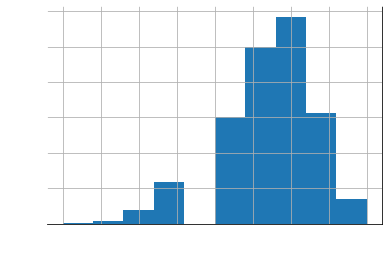

In [25]:
ax = mean.label.hist()
plt.xlabel("Correlation value")
plt.ylabel("Count")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

In [26]:
fig = ax.get_figure()
fig.savefig('../../images/label_hist.png', transparent=True)

In [36]:
mean.label.var()

0.4538614870434518

In [14]:
min_label = df.groupby(df['index']).aggregate({'title': 'first', 'article': 'first', 'label': 'min'})

In [15]:
max_label = df.groupby(df['index']).aggregate({'title': 'first', 'article': 'first', 'label': 'max'})

In [16]:
dist_df = pd.DataFrame()

In [17]:
dist_df['dist'] = max_label['label'] - min_label['label']

In [18]:
dist_df

,dist
index,
1305,1.0
6528,2.0
13823,1.0
29908,1.0
31325,2.0
...,...
2678751,1.0
2679327,0.0
2683873,0.0


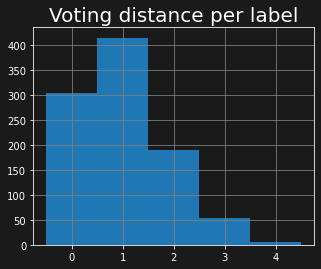

In [29]:
bins = [-0.5,0.5,1.5,2.5,3.5,4.5]
ax = dist_df.dist.hist(bins=bins)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

#plt.xticks(np.arange(0, 5, 0.5))

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Voting distance per label",
          fontsize=20,
          color="white")
plt.grid(c='gray')
fig.savefig('../../images/label_variance.png', transparent=False)

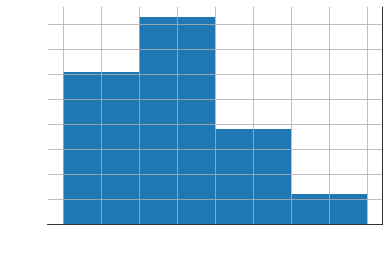

In [19]:
ax = dist_df.dist.hist(bins=4)
plt.xlabel("Correlation distance")
plt.ylabel("Count")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

In [33]:
fig = ax.get_figure()
fig.savefig('../../images/label_distance_hist.png', transparent=True)

In [35]:
dist_df.dist.var()

0.781486786522539